In [1]:
import speech_recognition as sr
import numpy as np
import os
from matplotlib.figure import Figure
from mpl_toolkits.axisartist.axislines import Subplot 
import dtw
import matplotlib.pyplot as plt
import librosa
import IPython.display
%matplotlib inline
from IPython.display import Image

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
r = sr.Recognizer() 

In [3]:
dirListing = os.listdir("C:\\Users\win10\Documents\\Speech_recognition\\.ipynb_checkpoints")
editFiles = []
for item in dirListing:
    if ".wav" in item:
        editFiles.append("C:\\Users\\win10\\Documents\\Speech_recognition"+'\\'+item)
print(editFiles)

['C:\\Users\\win10\\Documents\\Speech_recognition\\1.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\10.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\2.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\3.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\4.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\5.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\6.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\7.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\8.wav', 'C:\\Users\\win10\\Documents\\Speech_recognition\\9.wav']


In [4]:
my_audio = []
audio = []
for i in range(10):
    path = editFiles[i]
    my_audio.append(sr.AudioFile(path))
    with my_audio[i] as source:
        audio.append(r.record(source))

In [5]:
for i in range(10):
    r.recognize_google(audio[i], language="fa_IR")
r.recognize_google(audio[0], language="fa_IR")

'فرزاد فروزانفر'

C:\Users\win10\AppData\Local\Temp/ipykernel_6332/785238775.py:24: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01016537 -0.00968971
 -0.0098548 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccTest = librosa.feature.mfcc(y,sr)
C:\Users\win10\AppData\Local\Temp/ipykernel_6332/785238775.py:24: FutureWarning: Pass y=[0.         0.         0.         ... 0.00133326 0.00127462 0.0019043 ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccTest = librosa.feature.mfcc(y,sr)
C:\Users\win10\AppData\Local\Temp/ipykernel_6332/785238775.py:24: FutureWarning: Pass y=[0.         0.         0.         ... 0.00343474 0.00318114 0.00321193], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccTest = librosa.feature.mfcc(y,sr)
C:\Users\win10\AppData\Local\Temp/ipykernel_6332/785238775.py:24: Future

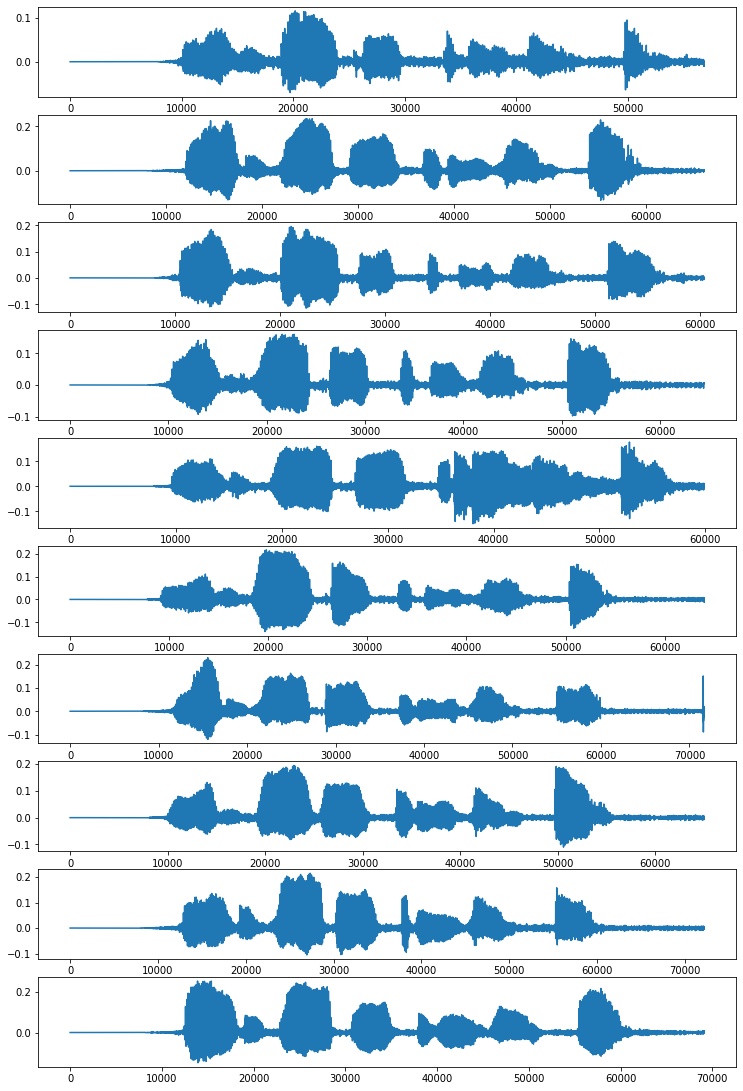

In [6]:
train_audio = []
sr_arr = []
mfcc_train = []
for i in range(10):
    
    #define variable to save data and rate audio
    path = editFiles[i]
    y, sr = librosa.load(path)
    
    #resize each figure to show better
    fig = plt.gcf()
    fig.set_size_inches(12.5, 19.5)
    
    #show matplotlib speek
    plt.subplot(10, 1, i+1)
    plt.plot(y)
    IPython.display.Audio(data=y, rate=sr)
    
    #Add data to train list:
    train_audio.append(y)
    sr_arr.append(sr)
    
    #Convert the data to mfcc:
    mfccTest = librosa.feature.mfcc(y,sr)
    mfcc_train.append(mfccTest)
    

In [7]:
np.set_printoptions(threshold=np.inf)
print(mfcc_train)

[array([[-8.04968994e+02, -8.04968994e+02, -8.04968994e+02,
        -8.04968994e+02, -8.04968994e+02, -8.04968994e+02,
        -8.04968994e+02, -8.04968994e+02, -8.04968994e+02,
        -8.04968994e+02, -8.04968994e+02, -8.04968994e+02,
        -8.04968994e+02, -8.04968994e+02, -7.92473694e+02,
        -7.58783752e+02, -6.44527283e+02, -5.52901245e+02,
        -5.00883972e+02, -4.46112213e+02, -4.05093231e+02,
        -3.87373047e+02, -3.73651031e+02, -3.61531677e+02,
        -3.55582184e+02, -3.48903778e+02, -3.43386536e+02,
        -3.42694275e+02, -3.39630127e+02, -3.48936981e+02,
        -3.44317963e+02, -3.30021851e+02, -3.35283203e+02,
        -3.53144073e+02, -3.75105469e+02, -3.92729706e+02,
        -3.55016937e+02, -3.23228851e+02, -3.24336945e+02,
        -3.31087463e+02, -3.36444122e+02, -3.45889587e+02,
        -3.55311493e+02, -3.59342224e+02, -3.66608398e+02,
        -3.72348206e+02, -3.81150482e+02, -4.15795776e+02,
        -4.60316071e+02, -4.17461609e+02, -3.84012756e+

In [8]:
# Remove mean and normalize each column of MFCC 

import copy
def preprocess_mfcc(mfcc_test):
    mfcc_cp = copy.deepcopy(mfcc_test)
    for i in range(len(mfcc_test[1])):
        mfcc_cp[:,i] = mfcc_test[:,i] - np.mean(mfcc_test[:,i])
        mfcc_cp[:,i] = mfcc_cp[:,i]/np.max(np.abs(mfcc_cp[:,i]))
    return mfcc_cp
mfcc_final = []
for i in range(10):
    mfcc_final.append(preprocess_mfcc(mfcc_train[i]))
    
mfcc_final

[array([[-1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+0

C:\Users\win10\AppData\Local\Temp/ipykernel_6332/1072777795.py:8: FutureWarning: Pass y=[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  

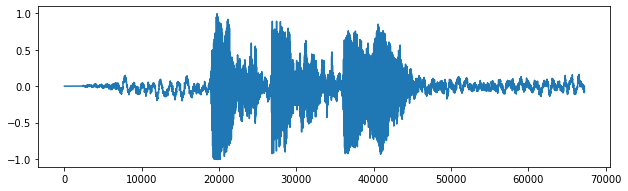

In [9]:
# add test audio
fig = plt.gcf()
fig.set_size_inches(10.25, 2.95)
yTest, srTest = librosa.load('Forouzanfar.wav')
plt.plot(yTest)

#Convert the data to mfcc:
mfccTest = librosa.feature.mfcc(yTest,srTest)
mfccTest = preprocess_mfcc(mfccTest)

In [10]:
len(mfcc_final[1])

20

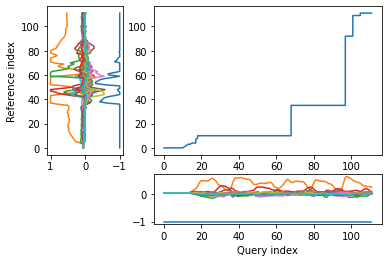

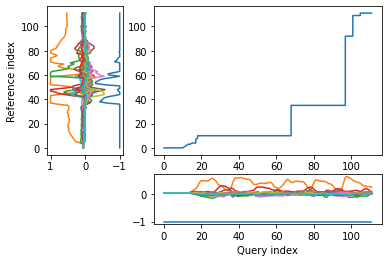

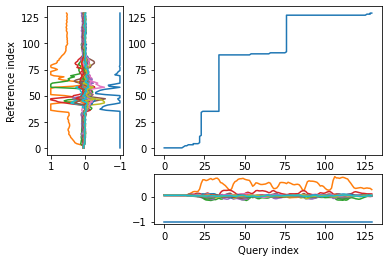

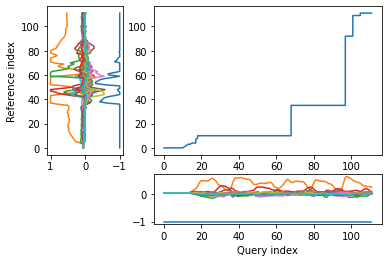

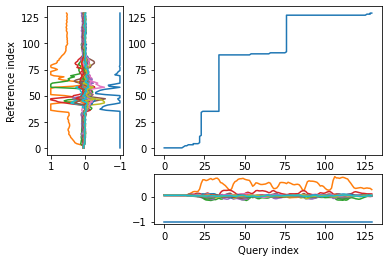

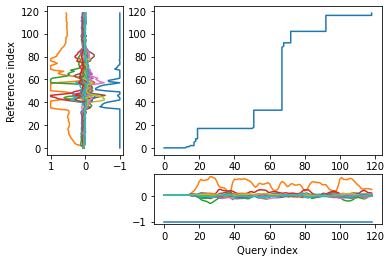

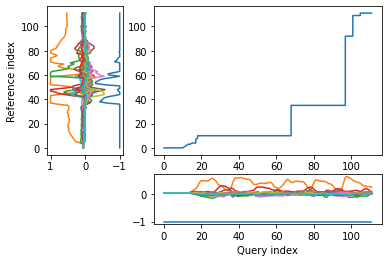

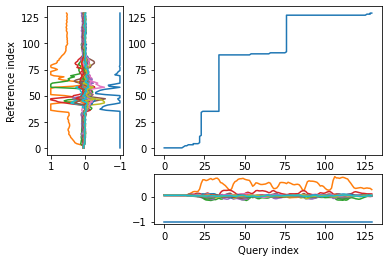

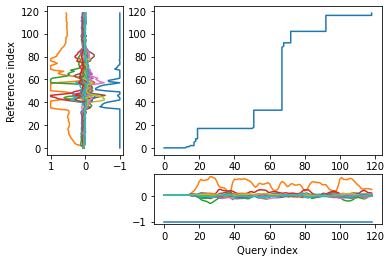

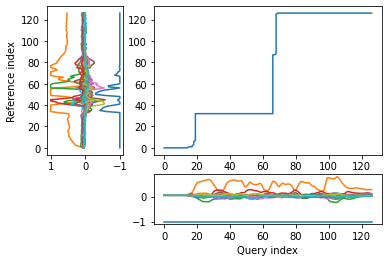

DTW alignment object of size (query x reference): 112 x 112


In [18]:
# have assembled our testing data and training data
from dtw import *

window_size = []
dists = []
dists_secondary = []
for i in range(len(mfcc_final)):
    window_elemnts = len(mfcc_final[i][-1])
    window_size.append(window_elemnts)
    dists.append(dist)
    
    for j in range(len(dists)):
        mfcci = mfccTest[:,j:j+window_size[j]]
        dists_temp = dtw(mfcc_final[j].T, mfcci.T,keep_internals=True)
        dists_secondary.append(dists_temp)
           
    
    dists_secondary[j].plot(type="threeway")
    
#plt.plot(dists_temp)

print(dists_secondary[1])


    

In [22]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
temp = []
for i in range(len(mfcc_final)):
    for j in range(len(mfcc_final[i])):
        temp.append(dtw.distance(mfcc_final[i][i], mfcc_final[i][j]))
    path_between_my_voice = np.array(temp)
    

path_between_my_voice = np.reshape(path,(10,20))


print(path_between_my_voice)

[[ 0.         14.51212627 10.48691891 12.08489856 10.918223   11.04004757
  10.49718231 11.06988657 11.01513179 11.05877812 11.06544811 11.05983824
  10.73383921 10.80168313 10.8926791  10.85193123 11.03183731 11.00672462
  10.99998992 10.75879985]
 [16.68817576  0.          5.4976873   3.4217487   4.96677408  4.72119182
   4.84914932  4.97746451  5.08196824  4.64270647  4.73337254  4.98263259
   5.23411944  5.24100296  4.83613298  5.15725853  5.15675167  5.38939779
   5.11839531  5.01657879]
 [10.61108541  4.87335942  0.          1.49883665  0.56062755  0.75023538
   0.51523294  0.85426993  0.66998672  0.83409535  0.87923984  0.88862994
   0.60619349  0.81438515  0.81802331  0.75954035  0.88085297  0.79628957
   0.93877979  0.70221774]
 [12.78291704  2.82011485  1.60193853  0.          0.92394652  0.68876874
   1.30469158  0.81642395  0.85564185  0.89950062  0.67529013  0.75223491
   1.16747173  1.21068398  1.1141767   1.15338228  0.9853926   1.12474074
   0.73693504  1.30687344]
 [10

In [24]:
temp = []
for i in range(len(mfcc_final)):
    for j in range(len(mfcc_final[i])):
        temp.append(dtw.distance(mfcc_final[i][i], mfccTest[j]))
    path_between_me_aother_voice = np.array(temp)
    
path_between_me_aother_voice = np.reshape(path2,(10,20))


print(path_between_me_aother_voice)

[[1.95458156 2.15315493 2.6253736  1.57748124 0.57562381 1.05795714
  0.86145635 0.62533542 1.1630501  0.76832451 0.70468299 0.30101841
  0.24427094 0.48065762 0.55949906 0.4670225  0.78334448 0.36391197
  0.60348453 0.18485391]
 [1.95458156 1.84126067 2.75768751 1.66512718 0.62590474 1.03405937
  1.04503315 0.59746918 1.03053597 0.71659791 0.65312993 0.28194154
  0.26980838 0.44078644 0.58730432 0.46420581 0.59430792 0.27077347
  0.5206158  0.34500841]
 [1.95458156 1.8035429  2.64892023 1.6594013  0.60178093 0.97561164
  0.8757028  0.61339428 1.06259251 0.65209299 0.69665265 0.33989058
  0.24943697 0.40666545 0.45155531 0.46391594 0.67586025 0.2774548
  0.61596568 0.22045574]
 [1.95458156 1.94075747 2.71575984 1.65597039 0.52939281 1.08132185
  0.80513312 0.63894719 1.15153224 0.70415475 0.70525581 0.32090653
  0.22609601 0.45459773 0.41678238 0.47362546 0.64784526 0.28605971
  0.57631119 0.21217515]
 [1.95458156 1.73195524 2.68225277 1.63273351 0.54254783 1.07975839
  0.77580299 0.56